In [17]:
# Importing all necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



In [18]:
# Reading the dataset

data = pd.read_csv("athlete_events.csv")
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,570,Pedro Abreu Pascal,M,23.0,200.0,88.0,Cuba,CUB,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,NaN
1019,571,Rubn Abreu Rivero,M,24.0,177.0,71.0,Venezuela,VEN,1996 Summer,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",NaN
1020,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,NaN
1021,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1023 non-null   int64  
 1   Name    1023 non-null   object 
 2   Sex     1023 non-null   object 
 3   Age     959 non-null    float64
 4   Height  773 non-null    float64
 5   Weight  776 non-null    float64
 6   Team    1023 non-null   object 
 7   NOC     1023 non-null   object 
 8   Games   1023 non-null   object 
 9   Year    1023 non-null   int64  
 10  Season  1023 non-null   object 
 11  City    1023 non-null   object 
 12  Sport   1023 non-null   object 
 13  Event   1023 non-null   object 
 14  Medal   112 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 120.0+ KB


Exploratory Data Analysis

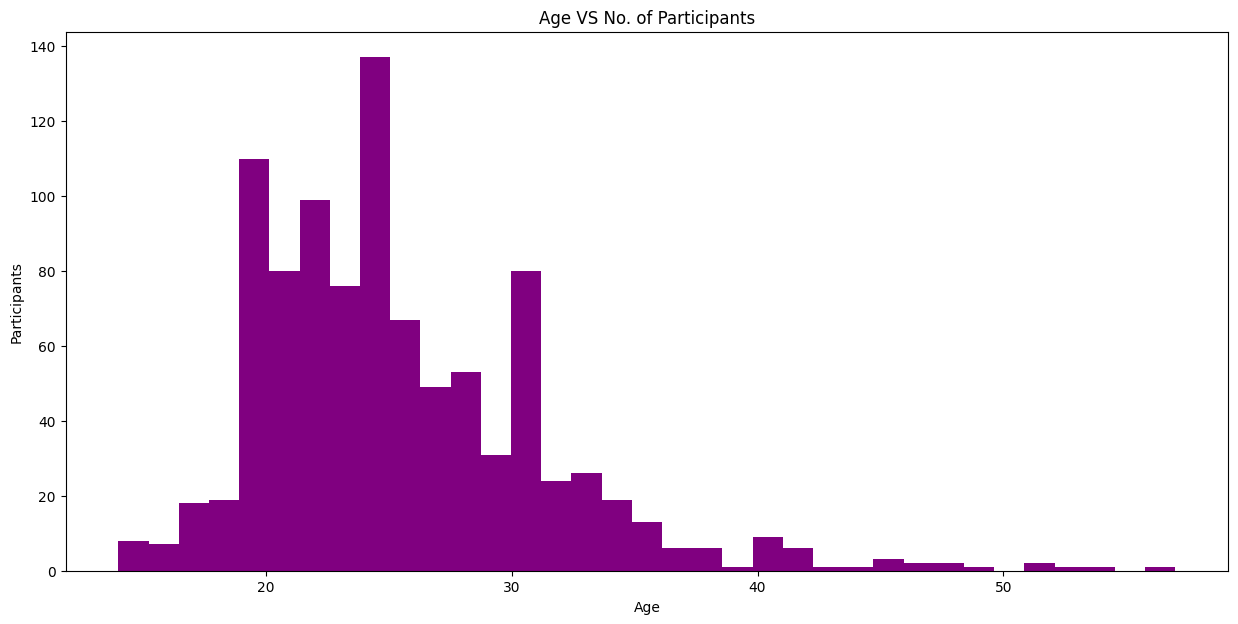

In [20]:
# Age Distribution 

plt.figure(figsize = (15 , 7))
plt.title("Age VS No. of Participants")
plt.hist(data.Age,color='purple', bins = 35)
plt.xlabel("Age")
plt.ylabel("Participants")
plt.show()

In [21]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Age to participant distribution

age_dist = data.Age.value_counts().sort_values(ascending=False).head(15)
age_dist

Age
22.0    99
21.0    80
23.0    76
24.0    75
19.0    68
26.0    67
25.0    62
28.0    53
27.0    49
30.0    45
20.0    42
31.0    35
29.0    31
33.0    26
32.0    24
Name: count, dtype: int64

In [25]:
# Gender Distribution 
gender_unique_values = data.Sex.value_counts()
gender_unique_values

Sex
M    857
F    166
Name: count, dtype: int64

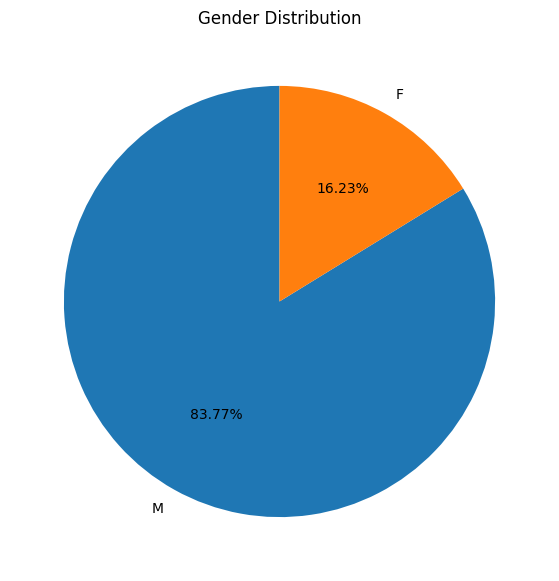

In [26]:
plt.figure(figsize=(15 , 7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values , labels=gender_unique_values.index,autopct="%.2f%%", startangle=90)
plt.show()


In [29]:
# Seeing female participants in each year in summer season
female_part = data[(data.Sex == 'F') & (data.Season == 'Summer')][['Sex' , 'Year']]
female_part = female_part.groupby('Year').count().reset_index()
female_part


,Year,Sex
0,1900,2
1,1932,2
2,1948,1
3,1956,2
4,1960,5
5,1964,1
6,1972,6
7,1976,1
8,1980,3
9,1984,7


Text(0, 0.5, 'Female Participants')

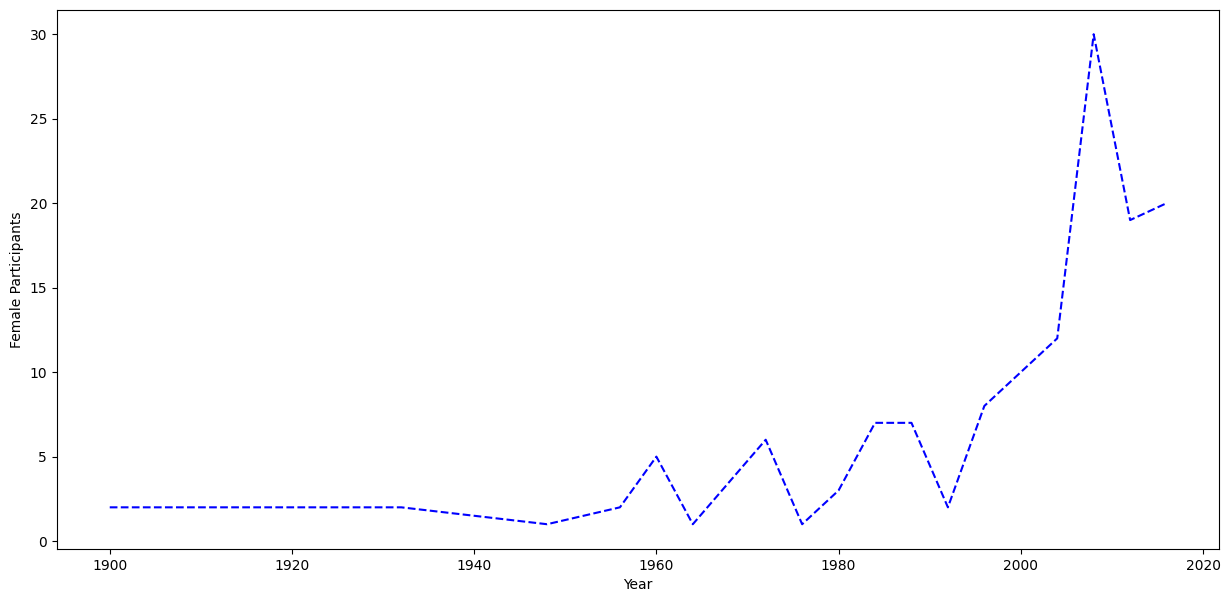

In [30]:
# Visualizing the female participant data 

plt.figure(figsize=(15 , 7))
sns.lineplot(data = female_part , x = 'Year' , y = 'Sex', linestyle = '--' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Female Participants')


In [32]:
# Participants across the season 
seasons = data.Season.value_counts()
seasons

Season
Summer    874
Winter    149
Name: count, dtype: int64

In [33]:
# Top 15 Countries participating in Olmypics by no. of participants
top_countries = data.Team.value_counts().sort_values(ascending=False).head(15)
top_countries 

Team
Egypt                   189
Norway                   59
United States            41
Finland                  34
Spain                    27
Japan                    27
Iraq                     25
Russia                   24
Italy                    21
United Arab Republic     21
Sweden                   19
Netherlands              19
Portugal                 18
Great Britain            17
Canada                   17
Name: count, dtype: int64

<Axes: title={'center': 'Top 15 Countries Total Participations'}, xlabel='Team', ylabel='count'>

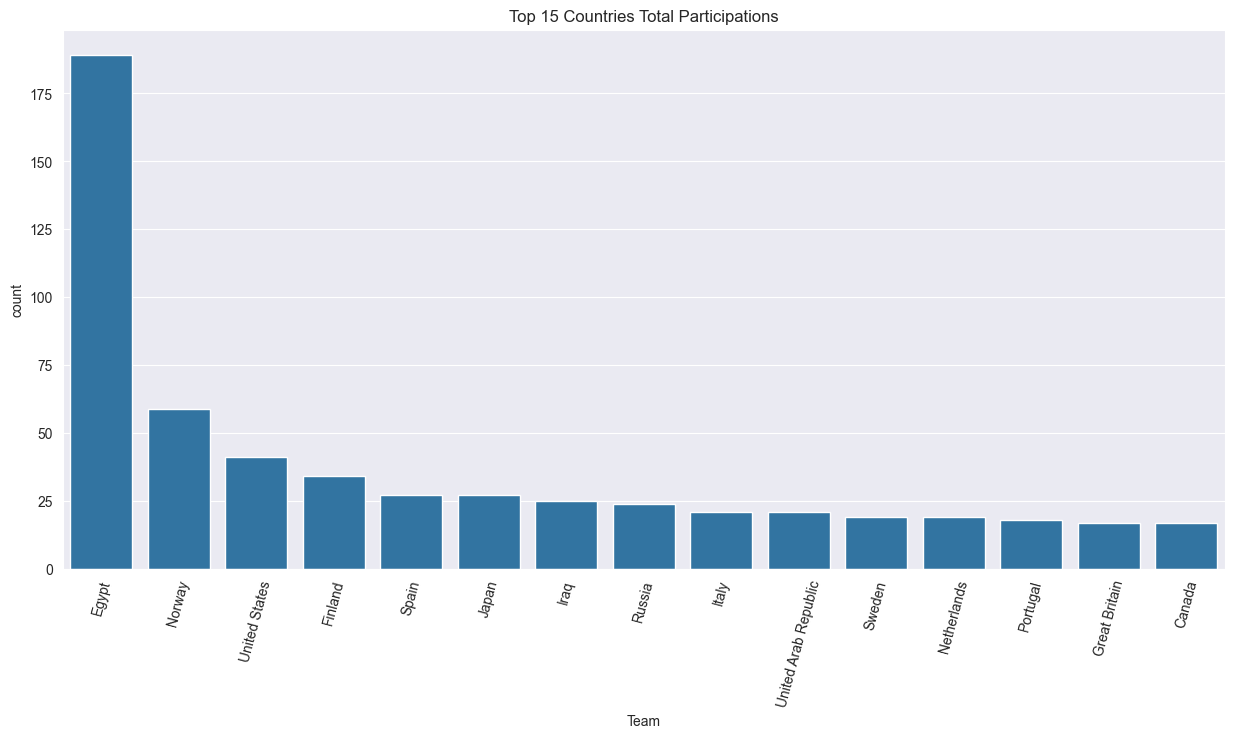

In [34]:
# data visualization of countries participating 
sns.set_style('darkgrid')
plt.figure(figsize=(15 , 7))
plt.title('Top 15 Countries Total Participations')
plt.xticks(rotation = 75)
sns.barplot(x = top_countries.index , y = top_countries)

In [37]:
# Data of countries with most Gold Medals

max_year_country = data[(data.Medal == 'Gold')].Team
max_year_country = max_year_country.value_counts().head(20)
max_year_country

Team
Norway              7
Italy               7
France              4
United States       4
Spain               3
Finland             3
Vesper Boat Club    2
Denmark/Sweden      1
Unified Team        1
Hungary             1
Bulgaria            1
Ethiopia            1
Canada              1
Japan               1
Soviet Union        1
Azerbaijan          1
Uzbekistan          1
Pakistan            1
Cameroon            1
Belarus             1
Name: count, dtype: int64

Text(0.5, 0, 'Top 20 Gold Medal Won Countrywise')

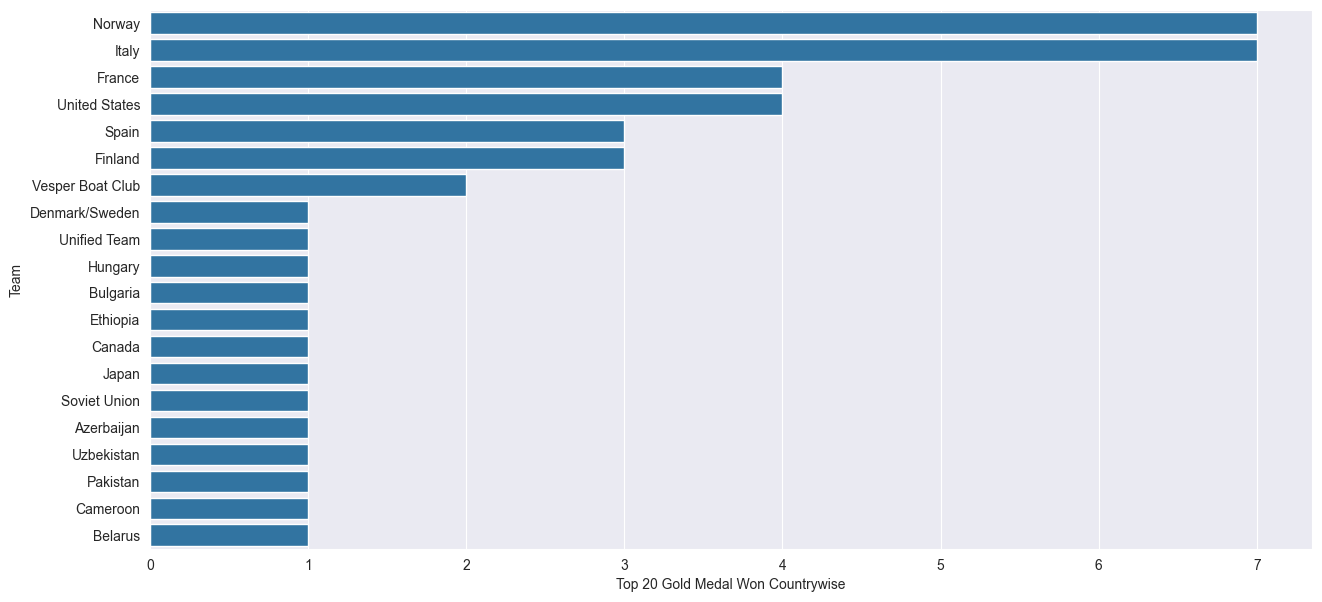

In [38]:
# Visualizong the countries with most Gold Medals

plt.figure(figsize=(15 , 7))
sns.barplot(x = max_year_country , y = max_year_country.index)
plt.xlabel("Top 20 Gold Medal Won Countrywise")

Text(0, 0.5, 'Height')

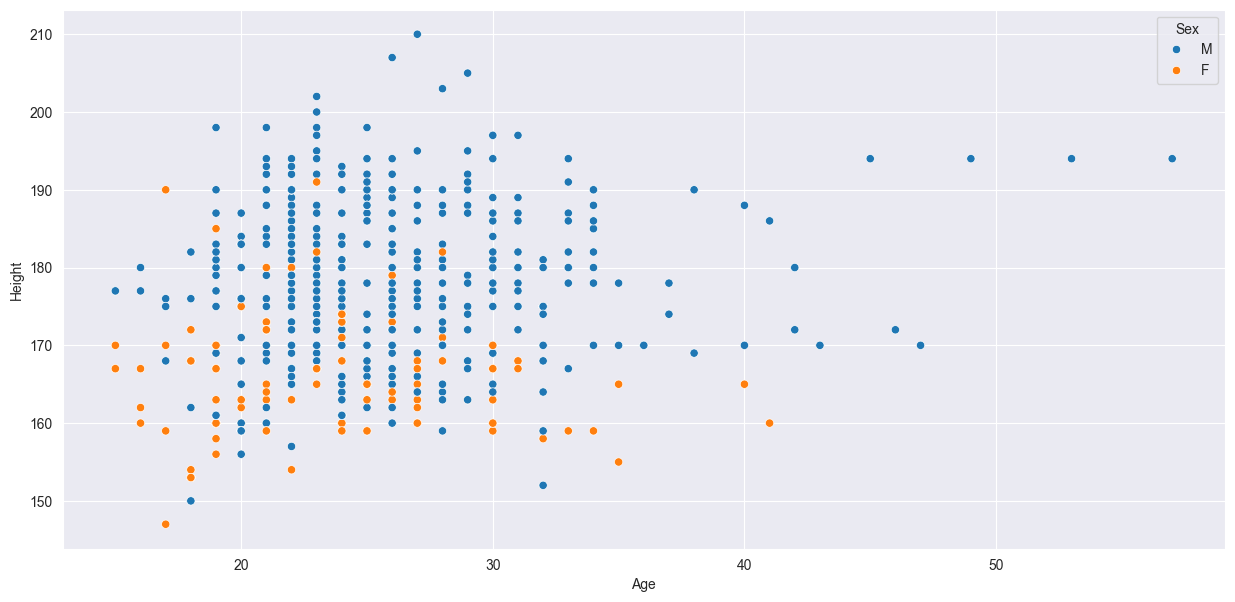

In [39]:
# Age vs Height Spread
age_heig = data[(data.Age != 0) & (data.Height != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_heig.Age, y=age_heig.Height, data=age_heig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Height')